# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

<h1 style="background-color:SlateBlue; color:White; text-align:center">Resources</h1>

- [20 Must-Know Pandas Function for Exploratory Data Analysis](https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/)
- [A Comprehensive Guide to Data Analysis using Pandas](https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-data-analysis-using-pandas-hands-on-data-analysis-on-imdb-movies-data/)
- [Python | Pandas dataframe.groupby()](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/)
- [Pandas: A Hands-On Guide for Beginners](https://www.analyticsvidhya.com/blog/2021/07/pandas-a-hands-on-guide-for-beginners/)
- [How to Perform Data Visualization with Pandas](https://www.analyticsvidhya.com/blog/2021/07/how-to-perform-data-visualization-with-pandas/)

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

items = pd.read_csv("roll_20_items.csv")
monsters = pd.read_csv("cleaned_monsters_basic.csv")
more_monsters = pd.read_csv("aidedd_blocks2.csv")

# I have 3 datasets to explore.  I want to look at each one at a time.

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

<h1 style="background-color:DodgerBlue; color:White; text-align:center">Items Data</h1>

In [123]:
items.info()

#exploring my datatypes, non-null counts, and column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item              771 non-null    object 
 1   type              771 non-null    object 
 2   notes             338 non-null    object 
 3   item_rarity       382 non-null    object 
 4   weight            610 non-null    float64
 5   attunement        771 non-null    int64  
 6   details           702 non-null    object 
 7   modifiers         186 non-null    object 
 8   ac                194 non-null    float64
 9   save              5 non-null      object 
 10  stealth           112 non-null    object 
 11  damage            204 non-null    object 
 12  damage_type       201 non-null    object 
 13  duration          11 non-null     object 
 14  secondary damage  31 non-null     object 
 15  range             88 non-null     object 
 16  properties        179 non-null    object 
dt

In [124]:
items.describe()
#there are 3 numeric columns in this dataset.  looking at a statistical summary of their values.

,weight,attunement,ac
count,610.000000,771.000000,194.000000
mean,12.898496,0.337224,13.443299
std,18.112379,0.473069,3.301653
min,0.000000,0.000000,2.000000
25%,2.000000,0.000000,12.000000
50%,4.000000,0.000000,14.000000
75%,13.000000,1.000000,15.000000
max,70.000000,1.000000,18.000000


Only 3 coluumns have numbers.  

- **Weight**: 610/771 items have significant weight with an average of ~13 pounds
- **Attunement**: every item has a 1 (attunement) or 0 (no attunement), with an average of ~30% requiring attunement
- **AC**: 194/771 items improve AC, with an average of ~13 points

In [125]:
items.head()
#sneak peek at the dataframe.  

,item,type,notes,item_rarity,weight,attunement,details,modifiers,ac,save,stealth,damage,damage_type,duration,secondary damage,range,properties
0,abacus,adventuring gear,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid,adventuring gear,consumable,NaN,1.0,0,"As an action, you can splash the contents of t...",NaN,NaN,NaN,NaN,2d6,acid,NaN,NaN,20/60,improvised weapons
2,adamantine armor,armor,"medium or heavy, but not hide",NaN,NaN,0,This suit of armor is reinforced with adamanti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alchemist's fire,adventuring gear,consumable,NaN,1.0,0,"This sticky, adhesive fluid ignites when expos...",NaN,NaN,dexterity,NaN,1d4,fire,NaN,NaN,20/60,improvised weapons
4,alchemist's supplies,adventuring gear,artisan's tools,standard,8.0,0,These Special tools include the items needed t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
items.columns
#what each column is called, followed by what each column means

Index(['item', 'type', 'notes', 'item_rarity', 'weight', 'attunement',
       'details', 'modifiers', 'ac', 'save', 'stealth', 'damage',
       'damage_type', 'duration', 'secondary damage', 'range', 'properties'],
      dtype='object')

Looking at **head** and **columns**, I can see how things are organized.

- **Item** (string) = an object's name
- **Type** (string) = its purpose in the game
- **Notes** (string) = attributes or how it is used
- **Item rarity** (string) = reflects the scarity of an object as well as its power.  The more rare (aka legendary, then the more powerful, but also smaller amount produced)  
    - Standard (see alchemist tools) come with that class.  
    - common --> uncommon --> rare --> very rare --> legendary and artefact.
- **weight** (float) = how heavy something is.  This is useful when adding up all the items, money, and weapons your character is holding.  Each race has a range of weight they can easily manage.  There are tiers for being overweight that change your movement, depending on how large the discrepancy is between allowed weight and actual weight.  
- **attunement** (int) = magicial items especially need to "attune" to the user in order to be used.  
- **details** (string) = requirements and extra info such as bonuses, perks, how to use notes
- **modifiers** (string) = any changes in the players current stats.  Could be positive or negative.
- **ac** (float) = stands for "Armor Class" reflects the total amount of base protection a character has from damage.  Typically accumulated from armor, shields, or magical items.
- **save** (string) = some items in the game require the character to check and see if they beat it or not.  Typically, a save is a die/dice roll compared to a specific stat.  If the character meets or beats the dice roll, then they either avoid the harm or take on the good thing (and vise versa if they miss the roll).
- **stealth** (string) = how sneaky something is.  Leather armor is a lot less noisy than full plate, which can cause a disadvantage in a sneaky situation.  
- **damage** (string) = The total possible amount of damage a weapon or spell can cause. a die value (sometimes die value + a skill modifier).
- **damage_type** (string) = there are different types of damage that is related to a weapon, or if magical an element.  A spear causes piercing damage, a club bludgeoning, and a fireball fire damage.  Certain gear, items, races, classes, monsters are immume to some damage types and others more vulenrable.
- **duration** (string) = how long an effect lasts.  if a spell has been successfully cast, it may last hours, days or seconds. 
- **secondary damage** (string) = is seen with two-handed weapons.  if using with 2 hands, you are stronger therefore causing more damgae.  
- **range** (string) = how close or far something is for a ranged character to successfully hit its target.  Some ranged weapons have a normal range and long range, when using long range you are at disadvantage
- **properties** (string) = weapon properties are how the weapon is used, and any extra steps it needs.  For example, a blowgun has range and loading properties.  meaning that after you fire (range) your will need to reload it (loading).

In [127]:
items.isnull().sum()
#Looking for tht total num of nulls per col.

item                  0
type                  0
notes               433
item_rarity         389
weight              161
attunement            0
details              69
modifiers           585
ac                  577
save                766
stealth             659
damage              567
damage_type         570
duration            760
secondary damage    740
range               683
properties          592
dtype: int64

There are a lot of nulls (NaN) values in the items dataframe.  

Not sure how to best handle these yet.

In [128]:
items.groupby('item')[['weight']].head()
#practicing how to groupby and item by its specific category. 
# Lists the value for each item
#.head() will print the values in a chart, otherwise : <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fb0d8585e50>

,weight
0,2.0
1,1.0
2,NaN
3,1.0
4,8.0
...,...
766,NaN
767,5.0
768,6.0
769,4.0


In [129]:
items.groupby("item")[['weight']].count()
#this will group by how many, however in this dataset each item name is unique, so all of the items will be listed.

,weight
item,
abacus,1
acid,1
adamantine armor,0
alchemist's fire,1
alchemist's supplies,1
...,...
wings of flying,0
woodcarver's tools,1
wooden shield,1


In [130]:
items.groupby("secondary damage")[["weight"]].head()

,weight
0,2.0
1,1.0
2,NaN
3,1.0
4,8.0
31,4.0
32,4.0
33,4.0
146,1.0
170,2.0


In [131]:
items.groupby("secondary damage")[["weight"]].count()
# calculates a total of the weight for each type of secondary damage weapon found

,weight
secondary damage,
1d10,14
1d8,13
2d10,1
2d6,3


In [132]:
damage= items.groupby("damage")
damage.first()
# first seems to be column-wise, while head/tail seem to be row-wise
#https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ <-- playing with this

,item,type,notes,item_rarity,weight,attunement,details,modifiers,ac,save,stealth,damage_type,duration,secondary damage,range,properties
damage,,,,,,,,,,,,,,,,
0,net +1,ranged weapon,None,None,3.0,0,You have a +1 bonus to Attack Rolls made with ...,"ranged attacks +1, ranged damage +1",NaN,None,None,None,None,None,5/15,"range, thrown"
1,blowgun,ranged weapon,"martial, blowgun",standard,1.0,0,Ammunition: You can use a weapon that has the ...,"ranged attacks +1, ranged damage +1",NaN,None,None,piercing,1 hour,None,25/100,"loading, range"
1d10,glaive,melee weapon,"martial, glaive",standard,6.0,0,You have a +1 bonus to Attack and Damage Rolls...,"melee attacks +1, melee damage +1",NaN,None,None,slashing,None,None,100/400,"heavy, reach, two-handed"
1d12,greataxe,melee weapon,"martial, axe",standard,7.0,0,You have a +1 bonus to Attack and Damage Rolls...,"melee attacks +1, melee damage +1",NaN,None,None,slashing,None,None,None,"heavy, two-handed"
1d4,alchemist's fire,adventuring gear,consumable,standard,1.0,0,"This sticky, adhesive fluid ignites when expos...","melee attacks +1, melee damage +1",NaN,dexterity,None,fire,1 minute,2d10,20/60,improvised weapons
1d6,hand crossbow,ranged weapon,"martial, crossbow",standard,3.0,0,Ammunition: You can use a weapon that has the ...,"ranged attacks +1, ranged damage +1",NaN,None,None,piercing,None,2d6,30/120,"light, loading, range"
1d8,battleaxe,melee weapon,"martial, axe",standard,4.0,0,You have a +1 bonus to Attack and Damage Rolls...,"melee attacks +1, melee damage +1",NaN,None,None,slashing,None,1d10,20/60,versatile
2d6,acid,adventuring gear,consumable,standard,1.0,0,"As an action, you can splash the contents of t...","melee attacks +1, melee damage +1",NaN,None,None,acid,None,2d6,20/60,improvised weapons
5,oil,adventuring gear,None,standard,1.0,0,Oil usually comes in a clay flask that holds 1...,None,NaN,None,None,fire,2 rounds,None,20/60,improvised weapons


In [133]:
items.nlargest(5, "weight")

,item,type,notes,item_rarity,weight,attunement,details,modifiers,ac,save,stealth,damage,damage_type,duration,secondary damage,range,properties
27,barrel,adventuring gear,NaN,NaN,70.0,0,A barrel can hold 40 gallons of liquid or 4 cu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,armor of invulnerability,heavy armor,armor,legendary,65.0,1,Requires Attunement\n\nYou have Resistance to ...,NaN,18.0,NaN,disadvantage,NaN,NaN,NaN,NaN,NaN,NaN
156,demon armor,heavy armor,"cursed item, armor",very rare,65.0,1,Requires Attunement\n\nWhile wearing this armo...,ac +1,18.0,NaN,disadvantage,NaN,NaN,NaN,NaN,NaN,NaN
169,dwarven plate,heavy armor,armor,very rare,65.0,0,"While wearing this armor, you gain a +2 bonus ...",ac +2,18.0,NaN,disadvantage,NaN,NaN,NaN,NaN,NaN,NaN
426,plate armor,heavy armor,armor,standard,65.0,0,"Plate consists of shaped, interlocking metal p...",NaN,18.0,NaN,disadvantage,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
items.nsmallest(5, "ac")

,item,type,notes,item_rarity,weight,attunement,details,modifiers,ac,save,stealth,damage,damage_type,duration,secondary damage,range,properties
9,animated shield,shield,shield,very rare,6.0,1,Requires Attunement\n\nWhile holding this Shie...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,arrow-catching shield,shield,shield,rare,6.0,1,Requires Attunement\n\nYou gain a +2 bonus to ...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,shield,shield,shield,standard,6.0,0,A shield is made from wood or metal and is car...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,shield +1,shield,NaN,NaN,6.0,0,"While holding this Shield, you have a +1 bonus...",ac +1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,shield +2,shield,NaN,NaN,6.0,0,"While holding this Shield, you have a +2 bonus...",ac +2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
items.nunique()

item                771
type                 16
notes                76
item_rarity           9
weight               32
attunement            2
details             379
modifiers            25
ac                    9
save                  2
stealth               1
damage                9
damage_type           7
duration              7
secondary damage      4
range                12
properties           27
dtype: int64

In [136]:
item_types = items[['item', 'type', 'weight']]
item_types.head()

,item,type,weight
0,abacus,adventuring gear,2.0
1,acid,adventuring gear,1.0
2,adamantine armor,armor,NaN
3,alchemist's fire,adventuring gear,1.0
4,alchemist's supplies,adventuring gear,8.0


In [137]:
#item_types.plot()

In [138]:
#items.plot(subplots=True)

In [139]:
#items.plot(kind="bar")

In [140]:
#items.plot.bar(stacked=True)

<AxesSubplot:>

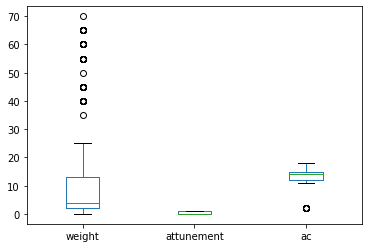

### Ideas to Explore in the Items df
- weapons: damage, magical/nonmagical, type, range/non-range
- magic items: damage? buffs? attunements?

<h1 style="background-color:Tomato; color:White; text-align:center">Monsters Data</h1>

In [141]:
#monsters.head()

#decluttering this section since I don't plan to use it. 

In [142]:
#monsters.shape
#(324, 45)

In [143]:
#monsters.describe()

In [144]:
#monsters.info()

<h1 style="background-color:MediumSeaGreen; color:White; text-align:center">More Monster Data</h1>

this has MORE monster data from more sources

In [145]:
more_monsters.shape

(762, 53)

In [146]:
more_monsters.describe()

,ac,hp,cr,speed,swim,fly,climb,burrow,passive_perception,darkvision,...,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation,legendary
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,14.595801,88.194226,5.546424,29.803150,4.960630,13.661417,2.952756,0.984252,13.023622,47.755906,...,1.639108,0.385827,0.520997,0.577428,0.750656,0.305774,0.144357,0.400262,0.392388,0.056430
std,3.095821,94.779066,6.252214,12.334075,14.447732,27.694709,9.217499,5.322924,3.908879,46.165198,...,2.703906,1.861346,2.026164,2.134730,2.625215,1.518936,0.983518,1.738079,1.898777,0.230903
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,22.000000,0.500000,30.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,58.000000,3.000000,30.000000,0.000000,0.000000,0.000000,0.000000,12.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,126.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,14.000000,60.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,676.000000,30.000000,120.000000,120.000000,150.000000,40.000000,50.000000,36.000000,240.000000,...,16.000000,16.000000,14.000000,15.000000,22.000000,17.000000,11.000000,14.000000,18.000000,1.000000


In [147]:
more_monsters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                762 non-null    object 
 1   size                762 non-null    object 
 2   type                762 non-null    object 
 3   alignment           762 non-null    object 
 4   languages           762 non-null    object 
 5   ac                  762 non-null    float64
 6   hp                  762 non-null    int64  
 7   cr                  762 non-null    float64
 8   speed               762 non-null    int64  
 9   swim                762 non-null    int64  
 10  fly                 762 non-null    int64  
 11  climb               762 non-null    int64  
 12  burrow              762 non-null    int64  
 13  passive_perception  762 non-null    int64  
 14  darkvision          762 non-null    int64  
 15  truesight           762 non-null    int64  
 16  tremorse

In [148]:
more_monsters.head()

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
0,aarakocra,medium,humanoid (aarakocra),neutral good,"Auran, Aarakocra",12.0,13,0.25,20,0,...,0,0,0,0,passive Perception 15,Dive Attack. If the aarakocra is flying and di...,"Talon. Melee Weapon Attack: +4 to hit, reach 5...",none,0,Monster Manual (BR)
1,abjurer,medium,humanoid (any race),any alignment,any four languages,12.0,84,9.00,30,0,...,0,0,0,0,passive Perception 11,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
2,aboleth,large,aberration,lawful evil,"Deep Speech, telepathy 120 ft.",17.0,135,10.00,10,40,...,0,0,0,0,"darkvision 120 ft., passive Perception 20",Amphibious. The aboleth can breathe air and wa...,Multiattack. The aboleth makes three tentacle ...,"The aboleth can take 3 legendary actions, choo...",1,Monster Manual (SRD)
3,abominable-yeti,huge,monstrosity,chaotic evil,Yeti,15.0,137,9.00,40,0,...,0,0,0,0,"darkvision 60 ft., passive Perception 15",unavailable,unavailable,unavailable,0,Monster Manual
4,acererak,medium,undead,neutral evil,"Abyssal, Common, Draconic, Dwarvish, Elvish, G...",21.0,285,23.00,30,0,...,15,0,0,0,"truesight 120 ft., passive Perception 22",unavailable,unavailable,unavailable,0,Adventures (Tomb of Annihilation)


In [182]:
more_monsters.columns

Index(['name', 'size', 'type', 'alignment', 'languages', 'ac', 'hp', 'cr',
       'speed', 'swim', 'fly', 'climb', 'burrow', 'passive_perception',
       'darkvision', 'truesight', 'tremorsense', 'blindsight', 'strength',
       'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 'intel', 'int_mod',
       'wis', 'wis_mod', 'cha', 'cha_mod', 'str_save', 'dex_save', 'con_save',
       'int_save', 'wis_save', 'cha_save', 'history', 'perception', 'stealth',
       'persuasion', 'insight', 'deception', 'arcana', 'religion',
       'acrobatics', 'athletics', 'intimidation', 'senses', 'attributes',
       'actions', 'legendary_actions', 'legendary', 'source'],
      dtype='object')

In [186]:
more_monsters.groupby("truesight").count()

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
truesight,,,,,,,,,,,,,,,,,,,,,
0,714,714,714,714,714,714,714,714,714,714,...,714,714,714,714,714,655,711,714,714,714
30,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
60,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
120,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


In [212]:
more_monsters.groupby("str_save").count()

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
str_save,,,,,,,,,,,,,,,,,,,,,
0,723,723,723,723,723,723,723,723,723,723,...,723,723,723,723,723,665,720,723,723,723
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,2,3,3,3,3
5,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
6,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
9,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


https://5thsrd.org/rules/abilities/ability_scores/
https://dnd.wizards.com/products/tabletop/dm-basic-rules

What each column means:

- **name**: Name of creature
- **size**: How large/small a creature is.
    - Tiny, Small, Medium, Large, Huge, Gargantuan
- **type**: The nature of the creature
    - Abberations, Beasts, Celestials, Dragons, Elementals, Fey, Fiends, Giants, Humanoids, Monstrosities, Oozes, Plants, Undead
- **alignment**: Dispositon of the creature
    - Options: Lawful Good, Neutral Good, Chaotic Good, Lawful Neutral, True Neutral, Chaotic Neutral, Lawful Evil, Neutral Evil, Chaotic Evil.
- **languages**: How the creature communicates/understands
- **ac**: Amount of protection a monster has.  Can be armor, shields, or naturally occuring
    - Ranges from 5-25
- **hp**: Amount of damage a monster can take
    - Ranges from 1-676
- **cr**: Challenge rating or estimated level of difficulty/threat of the creature. This rating matrix sets the amount of experience for players in the party.
    - CR range is 0-30, including 1/8, 1/4, 1/2 CRs
- **speed**: How far a monster can move on its turn. This includes flying, swimming, climbing, and burrowing
    - Typical Ranges: 0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 120 feet
- **swim**: Swimming speed - how fast a creature can swim and doesn't spend extra movement to swim
    - Typical Ranges: 0, 10, 20, 25, 30, 40, 50, 60, 80, 100, 120 feet
- **fly**: Flying speed - how far a creature can fly (some creatures have ability to hover)
    - Typical Ranges: 0, 10, 20, 25, 30, 40, 50, 60, 80, 90, 120, 150 feet
- **climb**: Climbing speed - How high a monster can climb
    - Typical Ranges: 0, 5, 10, 20, 25, 30, 40 feet
- **burrow**: Burrowing speed - How fast a creature can burrow through various terrains
    - Typical Ranges: 0, 5, 10, 15, 20, 30, 40, 50 feet
    - Terrain examples: ice, mud, sand, earth, rock only if special trait
- **passive_perception**: the threshold for a creature's observation skills
    - Ranged from 0-36
- **darkvision**: How well a creature can see in the dark
    - Typical ranges: 0, 30, 60, 90, 120, and 240 feet
- **truesight**: How well a creature can see in normal and magical darkness, see invisibile creatures/objects, and detect illusions
    - Typical ranges: 0, 30, 60, 120 feet
- **tremorsense**: Ability to detect the origin of vibrations within a speific range
    - Typical ranges: 0, 30, 60, 120 feet
- **blindsight**: Ability to see without eyes within a range
    - Typical ranges: 0, 10, 30, 60, 120, 500 feet
- **strength**: How strong a creature is.
    - Range: 1-30
- **str_mod**: The magnitude of strength a creature has.  Applied to proficiencies in related skill sets.  
    - Examples: athletics, wrestling, cracking walnuts with one hand
    - Range: -5 - +9
- **dex**: How agile a creature is
- **dex_mod**: The magnitude of agility a creature has.  Applied to proficiencies in related skill sets.
    - Examples: stealth, slight of hand, acrobatics
    - Range: -5 - +9
- **con**: How much endurance a creature has
- **con_mod**: The magnitude of endurance a creature has.  Applied to proficiencies in related skill sets.
    - Examples: amount of concentration for a spell, tolerances to bad food or poison
    - Range: -5 - +9
- **intel**: How intelligent a creature is
- **int_mod**: The magnitude of intelligent a creature has.  Applied to proficiencies in related skill sets.
    - Examples: certain spells require high intelligence, investigation skills, history factoids
    - Range: -5 - +8
- **wis**: How wise a creature is 
- **wis_mod**: The magnitude of wisdom a creature has.  Applied to proficiencies in related skill sets.
    - Examples: certain spells use wisdom to cast, perception, nature skills
    - Range: -5 - +8
- **cha**: How charasmatic a creature is
- **cha_mod**: The magnitude of charisma a creature has.  Applied to proficiencies in related skill sets.
    - Examples: certain spells use charisma to cast, persuation, intimidation
    - Range: -5 - +9
- **str_save**
- **dex_save**
- **con_save**
- **int_save**
- **wis_save**
- **cha_save**
- **history**
- **perception**
- **stealth**
- **persuasion**
- **insight**
- **deception**
- **arcana**
- **religion**
- **acrobatics** 
- **athletics**
- **intimidation**
- **senses**
- **attributes**
- **actions**
- **legendary_actions**
- **legendary**
- **source**

In [149]:
more_monsters.isnull().sum()

name                   0
size                   0
type                   0
alignment              0
languages              0
ac                     0
hp                     0
cr                     0
speed                  0
swim                   0
fly                    0
climb                  0
burrow                 0
passive_perception     0
darkvision             0
truesight              0
tremorsense            0
blindsight             0
strength               0
str_mod                0
dex                    0
dex_mod                0
con                    0
con_mod                0
intel                  0
int_mod                0
wis                    0
wis_mod                0
cha                    0
cha_mod                0
str_save               0
dex_save               0
con_save               0
int_save               0
wis_save               0
cha_save               0
history                0
perception             0
stealth                0
persuasion             0


In [150]:
more_monsters.nlargest(5, "cr")

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
643,tarrasque,gargantuan,monstrosity (titan),unaligned,none,25.0,676,30.0,40,0,...,0,0,0,0,"blindsight 120 ft., passive Perception 10",Legendary Resistance (3/Day). If the tarrasque...,Multiattack. The tarrasque can use its Frightf...,"The tarrasque can take 3 legendary actions, ch...",1,Monster Manual (SRD)
652,tiamat,gargantuan,fiend,chaotic evil,"Common, Draconic, Infernal",25.0,615,30.0,60,0,...,17,0,0,0,"darkvision 240 ft., truesight 120 ft., passive...",unavailable,unavailable,unavailable,0,Adventures (Tyranny of Dragons)
169,demogorgon,huge,fiend (demon),chaotic evil,"all, telepathy 120 ft.",22.0,406,26.0,50,50,...,0,0,0,0,"truesight 120 ft., passive Perception 29",unavailable,unavailable,unavailable,0,Mordenkainen's Tome of Foes
502,orcus,huge,fiend (demon),chaotic evil,"all, telepathy 120 ft.",17.0,405,26.0,40,0,...,0,0,0,0,"truesight 120 ft., passive Perception 22","Wand of Orcus. The wand has 7 charges, and any...",Multiattack. Orcus makes two Wand of Orcus att...,"Orcus can take 3 legendary actions, choosing f...",1,Mordenkainen's Tome of Foes
759,zariel,large,fiend (devil),lawful evil,"all, telepathy 120 ft.",21.0,580,26.0,50,0,...,0,0,0,18,"darkvision 120 ft., passive Perception 26",Devil's Sight. Magical darkness doesn't impede...,Multiattack. Zariel attacks twice with her lon...,"Zariel can take 3 legendary actions, choosing ...",1,Mordenkainen's Tome of Foes


In [151]:
more_monsters.duplicated().sum()

0

In [152]:
more_monsters.corr()

,ac,hp,cr,speed,swim,fly,climb,burrow,passive_perception,darkvision,...,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation,legendary
ac,1.000000,0.668608,0.707400,0.259286,0.074267,0.334696,0.005731,0.203993,0.551881,0.299636,...,0.159312,0.167344,0.254001,0.159437,0.082493,0.052027,0.065367,0.118756,0.228655,0.353649
hp,0.668608,1.000000,0.926309,0.264551,0.185713,0.365880,-0.005170,0.212331,0.638400,0.245644,...,0.069306,0.204829,0.299252,0.169126,0.180117,0.099673,-0.030539,0.051138,0.233970,0.489883
cr,0.707400,0.926309,1.000000,0.224442,0.125081,0.354818,-0.026808,0.158885,0.679880,0.249490,...,0.073048,0.216259,0.346519,0.219698,0.280647,0.119612,-0.014661,0.041790,0.272365,0.484703
speed,0.259286,0.264551,0.224442,1.000000,-0.053137,-0.015583,0.091807,0.130051,0.232996,0.043879,...,0.135183,0.077149,0.091395,0.051735,0.013701,0.049510,0.091172,0.070494,0.068950,0.077730
swim,0.074267,0.185713,0.125081,-0.053137,1.000000,0.058982,-0.092373,0.005631,0.132180,0.067542,...,0.024359,0.082657,0.093847,-0.036755,-0.051535,-0.044061,-0.050462,-0.042543,-0.065300,0.136563
fly,0.334696,0.365880,0.354818,-0.015583,0.058982,1.000000,-0.024390,0.154691,0.439707,0.221654,...,0.094003,0.126782,0.107872,0.051321,0.016008,0.047384,-0.072498,-0.113748,0.079095,0.388901
climb,0.005731,-0.005170,-0.026808,0.091807,-0.092373,-0.024390,1.000000,0.034427,0.065169,0.073030,...,0.219702,-0.045044,-0.069815,0.009402,-0.068911,-0.058941,-0.047080,0.056547,-0.043763,0.020394
burrow,0.203993,0.212331,0.158885,0.130051,0.005631,0.154691,0.034427,1.000000,0.150771,0.141351,...,0.060319,0.059767,-0.047609,-0.050082,-0.052942,-0.037272,-0.027176,-0.004289,-0.038262,0.211345
passive_perception,0.551881,0.638400,0.679880,0.232996,0.132180,0.439707,0.065169,0.150771,1.000000,0.259168,...,0.299445,0.221615,0.353339,0.213163,0.266290,0.204832,0.017911,0.038063,0.218111,0.500810
darkvision,0.299636,0.245644,0.249490,0.043879,0.067542,0.221654,0.073030,0.141351,0.259168,1.000000,...,0.310685,0.045873,0.059016,0.100636,-0.046367,0.005114,-0.018324,-0.078372,-0.017974,0.190643


In [153]:
more_monsters.nunique()

name                  762
size                    6
type                   71
alignment              17
languages             197
ac                     20
hp                    159
cr                     31
speed                  11
swim                   11
fly                    11
climb                   7
burrow                  8
passive_perception     26
darkvision              6
truesight               4
tremorsense             4
blindsight              6
strength               30
str_mod                15
dex                    24
dex_mod                15
con                    24
con_mod                12
intel                  27
int_mod                14
wis                    26
wis_mod                14
cha                    29
cha_mod                15
str_save               17
dex_save               13
con_save               16
int_save               16
wis_save               17
cha_save               18
history                14
perception             20
stealth     

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [164]:
#more_monsters.plot.box()

In [163]:
#more_monsters.boxplot()
#as is, x axis has too many values.


<AxesSubplot:xlabel='cr'>

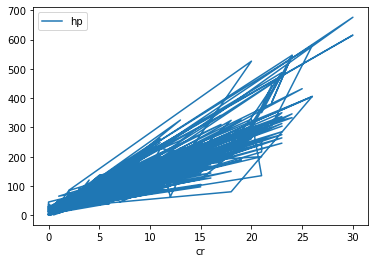

In [180]:
more_monsters.plot(x="cr", y="hp")

<AxesSubplot:xlabel='cr', ylabel='hp'>

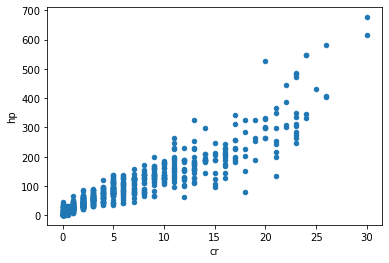

In [162]:
more_monsters.plot.scatter(x="cr", y="hp")
#Looking at hit points vs challenge rating 

<div style=background-color:orange;>^^^^ This is what I am looking for - cr and hp can help me better create a monster encounter for my party</div>

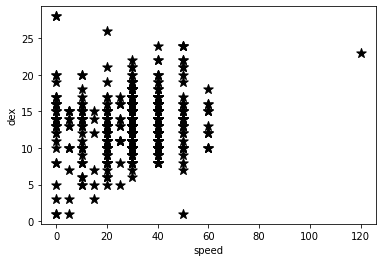

In [174]:
ax=more_monsters.plot.scatter(x="speed", y="dex", color="black", marker="*", s=100)

<AxesSubplot:xlabel='stealth', ylabel='dex_mod'>

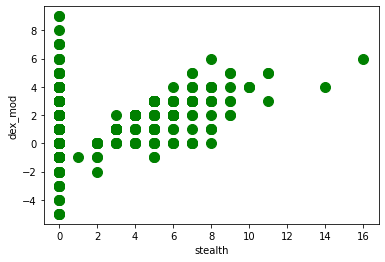

In [179]:
more_monsters.plot.scatter(x="stealth", y="dex_mod", color="green", s=100)

<AxesSubplot:>

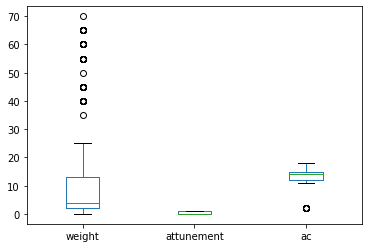

In [156]:
items.plot.box()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

 The **items** dataframe contains a lot of nulls.  not sure if i should clean them by replacing them with something or if i should leave them.
 
 The **more_monsters** dataframe contains monsters from more resources (762 rows + 52 col compared to **monsters** with 324 + 45 col)
 
 I think I will use **items** and **more_monsters** for the rest of this assignment